In [1]:
import pandas as pd
import pickle

In [9]:
data = pickle.load(open('/Users/saklenshaikh/Desktop/Ds Term 2/Ims-Final-Project/Flipcart/Flipkarttweet_data.pkl','rb'))

In [10]:
data.head()

,Date,user,Tweet
0,2022-09-09 11:14:56+00:00,Flipkart,Attention!!🤩\n\nTune in to the Flipkart app on...
1,2022-09-08 06:25:15+00:00,Flipkart,@Apple @realmeIndia @SamsungIndia @XiaomiIndia...
2,2022-09-08 06:25:13+00:00,Flipkart,Not us bringing you smartphones at The Big Bil...
3,2022-09-07 10:38:47+00:00,Flipkart,@Cleartrip the only acceptable change we are i...
4,2022-09-02 10:07:15+00:00,Flipkart,shopping


In [11]:
import pandas as pd
import pickle
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [12]:
data=pd.DataFrame(data.Tweet)

data.head()

,Tweet
0,Attention!!🤩\n\nTune in to the Flipkart app on...
1,@Apple @realmeIndia @SamsungIndia @XiaomiIndia...
2,Not us bringing you smartphones at The Big Bil...
3,@Cleartrip the only acceptable change we are i...
4,shopping


In [15]:
data.iloc[720]

Tweet    Bring Home a TV, This World TV Day! \nAssured ...
Name: 720, dtype: object

# Data Cleaning And Preprocessing

In [16]:
data.Tweet=data.Tweet.str.lower()

In [17]:
data.iloc[720]

Tweet    bring home a tv, this world tv day! \nassured ...
Name: 720, dtype: object

In [18]:
data

,Tweet
0,attention!!🤩\n\ntune in to the flipkart app on...
1,@apple @realmeindia @samsungindia @xiaomiindia...
2,not us bringing you smartphones at the big bil...
3,@cleartrip the only acceptable change we are i...
4,shopping
...,...
4995,the carrier cyclojet is the latest in ac techn...
4996,@waliamandeep spoiler alert!\n\n:)
4997,beauty lies within. #beautyandthebeast https:/...
4998,experience the future of 3d gaming with the so...


In [19]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
def remove_punctuation(Tweet):
    text_nopunt="".join([c 
                         for c in data
                         if c not in string.punctuation])
    return text_nopunt

In [21]:
data.iloc[720]

Tweet    bring home a tv, this world tv day! \nassured ...
Name: 720, dtype: object

In [22]:
data.head()

,Tweet
0,attention!!🤩\n\ntune in to the flipkart app on...
1,@apple @realmeindia @samsungindia @xiaomiindia...
2,not us bringing you smartphones at the big bil...
3,@cleartrip the only acceptable change we are i...
4,shopping


# # Remove URL

\S == Returns a match where the string DOES NOT contain a white space character 
( http / www.) (+) == one or more occurance

In [25]:
data.Tweet = data.Tweet.str.replace(r'http\S+|www.\S+','',case=False)
data.iloc[720,0]

'bring home a tv, this world tv day! \nassured deals for everyone on mi, samsung, realme, oneplus &amp; more!'

# Remove Number

\d == Returns a match where the string contains digits (numbers from 0-9) (+) == one or more occurance

In [26]:
data['Tweet'] = data['Tweet'].str.replace('\d+','')

In [27]:
data.iloc[720,0]

'bring home a tv, this world tv day! \nassured deals for everyone on mi, samsung, realme, oneplus &amp; more!'

# Removing Stop Words

In [28]:
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saklenshaikh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
data.iloc[720,0]

'bring home a tv, this world tv day! \nassured deals for everyone on mi, samsung, realme, oneplus &amp; more!'

# Common Words

In [30]:
import re # replace of words
nltk.download('words') # downloading dictionary of nltk  
words = set(nltk.corpus.words.words()) # corpus & set array 
words

[nltk_data] Downloading package words to
[nltk_data]     /Users/saklenshaikh/nltk_data...
[nltk_data]   Package words is already up-to-date!


{'swearword',
 'Tatsanottine',
 'godkin',
 'incommutability',
 'nonluminescent',
 'tibioscaphoid',
 'vage',
 'rangeman',
 'slipknot',
 'bedder',
 'lentigo',
 'Leninism',
 'luciferously',
 'manostatic',
 'melanuresis',
 'havenet',
 'morricer',
 'sheikhlike',
 'Thanatos',
 'dressily',
 'hussydom',
 'foreaccustom',
 'kenaf',
 'astrodome',
 'apprenticehood',
 'arrentation',
 'impetus',
 'heterochrosis',
 'hitchiness',
 'nauseation',
 'aeolharmonica',
 'nonsanctity',
 'lubricous',
 'redaction',
 'unexperimental',
 'latten',
 'Jill',
 'thermotropism',
 'Hadjemi',
 'unfaithfulness',
 'sapucainha',
 'ashrafi',
 'microzoaria',
 'edacity',
 'pabulatory',
 'unsatiable',
 'forebackwardly',
 'cumhal',
 'plantal',
 'chantey',
 'overtender',
 'immediatist',
 'abjurer',
 'chaetodontid',
 'photosphere',
 'premastery',
 'senatory',
 'Georgiana',
 'scrimer',
 'Mohawk',
 'birr',
 'hircocerf',
 'preacher',
 'Rebecca',
 'sidesplitting',
 'trichogynial',
 'seigneurage',
 'Algomic',
 'supposal',
 'bigotry',
 

In [31]:
# Apply a second round of cleaning
def clean_text_round2(Tweet):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    Tweet =  re.sub('tweet', '', Tweet) 
    Tweet =  re.sub('flipkart|@flipkart','', Tweet)
    Tweet =  re.sub('delivery','', Tweet ) 
    Tweet =  re.sub(r"\b[a-zA-Z]\b", "", Tweet ) ## 1 alphabet like a or s
    Tweet =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", Tweet )  ## 2 alphabet like ab or ad & aA
    Tweet =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(Tweet)  ## this will give you tokens 
                      if w.lower() in words)  #    
    return Tweet

In [32]:
import re

In [34]:
# Let's take a look at the updated text
#data['text']=data['text'].apply(lambda x : clean_text_round2(x))
data = pd.DataFrame(data.Tweet.apply( lambda x : clean_text_round2(x)))
data.iloc[720,0]

'bring home this world day assured for everyone more'

In [38]:
### Stemming
#import nltk

# let's import the libraries
#from nltk.stem.snowball import SnowballStemmer

#the most commonly used stemmer
#ss = SnowballStemmer("english") w_tokenizer = nltk.tokenize.WhitespaceTokenizer() lemmatizer = nltk.stem.WordNetLemmatizer()

#def SnowballStemmer_text(text): return [ss.stem(w) for w in w_tokenizer.tokenize(text)]

#data.head()

#data['tweet'] = data.tweet.apply(lambda x :' '.join(SnowballStemmer_text(x))) data.head()

# Lemmatization

In [39]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet') # DOWNLAOD WORDNET
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer() # ASSIGNING
w_tokenizer = nltk.tokenize.WhitespaceTokenizer() ## Word Token

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/saklenshaikh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [40]:
def lemmatize_text(Tweet):
    return [lemmatizer.lemmatize(w,"v") for w in w_tokenizer.tokenize(tweet)]

In [41]:
data.iloc[720,0]

'bring home this world day assured for everyone more'

# Strip extra whitespace

In [42]:
data.iloc[720,0]

'bring home this world day assured for everyone more'

In [43]:
data['Tweet'] = (data['Tweet'].astype("str").str.rstrip())
data.iloc[720,0]

'bring home this world day assured for everyone more'

# Finished Data Cleaning

# Term Document Matrix

In [44]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') # BACK UP
data_cv = cv.fit_transform(data.Tweet)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names()) # TERM = KEY WORDS

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
abandoned,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ablaze,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aboard,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,freq
abandoned,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
ablaze,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
aboard,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,freq
0,abandoned,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,ability,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,ablaze,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
4,aboard,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
tdm1=tdm[["index","freq"]] #SUBSET OF 2 COLUMNS
tdm1.rename(columns = {'index':'Word'}, inplace = True) # RENAMING 
tdm1.sort_values(by='freq',ascending=False,inplace=True) # SORTING DATA 
tdm1.head(20)

,Word,freq
1190,fashion,655
2988,special,564
2172,offer,558
3375,try,500
2858,shop,432
2732,sale,406
2124,new,391
269,best,374
1742,just,319
280,big,292


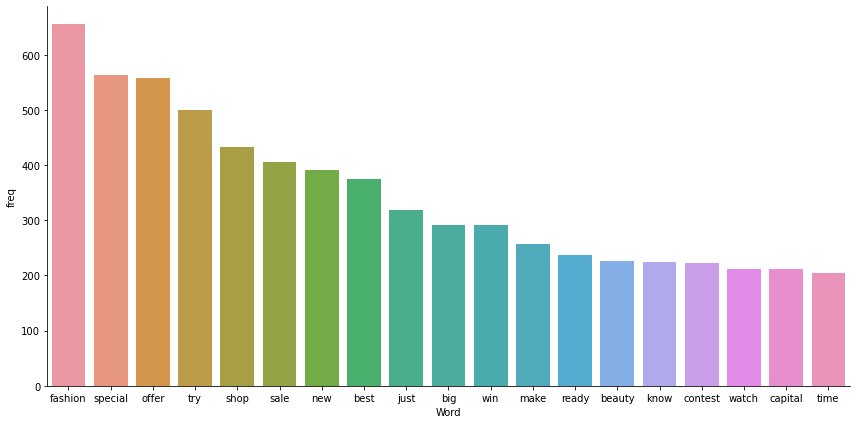

In [51]:
import seaborn as sns
w = tdm1[tdm1['freq'] >=200] 
fg = sns.factorplot(x='Word', y='freq',
                        size=6,  aspect=2,
                        kind='bar', 
                        data=w)

In [52]:
Tweet = " ".join(review for review in data.Tweet)
print ("There are {} words in the combination of all review.".format(len(Tweet)))

There are 339313 words in the combination of all review.


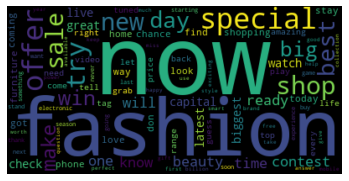

In [53]:
## collocations=False means try to contro the duplicate keyword and counts as 1
# lower max_font_size, change the maximum number of word and lighten the background:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, # BACK UP
                      background_color="black",
                      collocations=False,
                       max_words=100).generate(Tweet)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear') # IM = IMAGE 
plt.axis("off") # NO AXIS
plt.show() # DISPLAY PLOT

# Sentiment Analysis

In [54]:
data

,Tweet
0,attention tune the grab the big billion days e...
1,apple
2,not you the big billion days even before the s...
3,the only acceptable change are for the new loo...
4,shopping
...,...
4995,the carrier the latest technology efficiently ...
4996,spoiler alert
4997,beauty within
4998,experience the future gaming with the headset ...


In [55]:
data = data.drop_duplicates(subset='Tweet') 

In [56]:
data

,Tweet
0,attention tune the grab the big billion days e...
1,apple
2,not you the big billion days even before the s...
3,the only acceptable change are for the new loo...
4,shopping
...,...
4995,the carrier the latest technology efficiently ...
4996,spoiler alert
4997,beauty within
4998,experience the future gaming with the headset ...


In [57]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity # polarity range -1 to +1
data['polarity'] = data['Tweet'].apply(pol)
data.head(5)

,Tweet,polarity
0,attention tune the grab the big billion days e...,0.333333
1,apple,0.000000
2,not you the big billion days even before the s...,0.200000
3,the only acceptable change are for the new loo...,0.045455
4,shopping,0.000000


In [58]:
data['Sentiment'] = np.where(data['polarity']>= 0, 'Positive', 'Negative')
data.head()

,Tweet,polarity,Sentiment
0,attention tune the grab the big billion days e...,0.333333,Positive
1,apple,0.000000,Positive
2,not you the big billion days even before the s...,0.200000,Positive
3,the only acceptable change are for the new loo...,0.045455,Positive
4,shopping,0.000000,Positive


<AxesSubplot:>

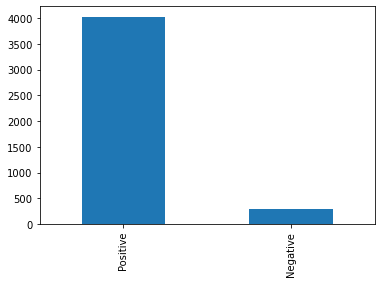

In [59]:
data.Sentiment.value_counts().plot.bar()

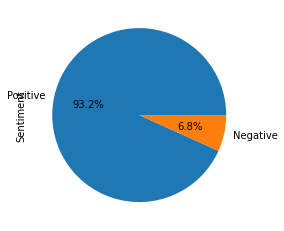

In [60]:
data.Sentiment.value_counts().plot.pie(autopct="%.1f%%");